___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# 911 Calls Project

In these project based exercises fundamental Pandas, Seaborn and Matplotlib coding is used to analyse the data on 911 Calls from December 2015 – August 2016.  to do calculations.  This dataset can be obtained from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

These Pandas exercises were done through Jose Portilla (head of Data Science at Pierian Data Inc.) on Udemy.

Some of the fundamental analysis done in this project is as follows:
* The zipcodes and townships from where the most calls were received are determined.
* The timestamp column is converted to a datetime type and information extracted is (hour of a call, day of the week of a call, month of the call etc.) for further analysis.
* A mapping dictionary is used to change an integer column to a string column.
* Using visualizations to determine the months and on which days 911 received the most and least calls for Medical Services, Traffic and Fire.
* Creating line plots of the number of calls per day for each of the call reasons (Emergency Medical Services, Fire and Traffic).  Deductions are made regarding the days on which there were spikes in the number of calls.
* Creating heatmaps and clustermaps to determine:
  ** The hours in the days of a week where the most and least emergency calls occurred.
  ** The days of the months where the most and least emergency calls occurred.

____
** Import numpy and pandas and visualization libraries.  Set %matplotlib inline. **

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read the csv file. **

In [105]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [107]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [108]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

## Exploratory Data Analysis

** What are the top 5 zipcodes for 911 calls? **

In [109]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [110]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** How many unique title codes are there? **

In [111]:
df['title'].unique().shape[0]

110

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.  Create a new column called "Reason" that contains this string value.**

In [112]:
df['Reason'] = ""

In [113]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,


In [114]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [115]:
reason = df['Reason']
reason

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [116]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [117]:
reason.value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [118]:
# The most common reason for 911 calls is emergency medical services.

** Now use seaborn to create a countplot of 911 calls by Reason. **

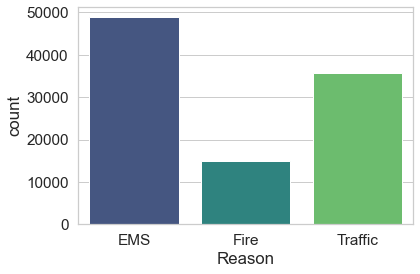

In [119]:
sns.set_style('whitegrid')
counts = sns.countplot(x= 'Reason', data=df, palette = 'viridis')

In [120]:
# Visualizing the number of calls for Emergency Medical Srvices, Fire and Traffic.  More than 3 times as many calls are made for
# Emergency Medical Services than for Fire related emergencies. 

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [121]:
type(df['timeStamp'].iloc[0])

str

In [122]:
type(df['timeStamp'])

pandas.core.series.Series

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
 9   Reason     99492 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


** Use [pd.to_datetime] to convert the column from strings to DateTime objects. **

In [124]:
pd.to_datetime(df['timeStamp'])

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [125]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

In [126]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [127]:
time.year

2015

In [128]:
time.day_of_week

3

In [129]:
time.month

12

** Create columns 'Hour', 'Month' and 'Day of week' and extract the hours, months and days of week from the timeStamp column.**

In [130]:
df['Hour'] = df.timeStamp.dt.hour
df['Month'] = df.timeStamp.dt.month
df['Day_of_week'] = df.timeStamp.dt.weekday

In [131]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [132]:
type(df['Day_of_week'].iloc[0])

numpy.int64

** Currently Day of Week is an integer 0-6. We can use the .map() function to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [29]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [30]:
# Changing the Day of week entries to their respective string varaibles (the name of the specific day):

df['Day_of_week'] = df['Day_of_week'].map(dmap)
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

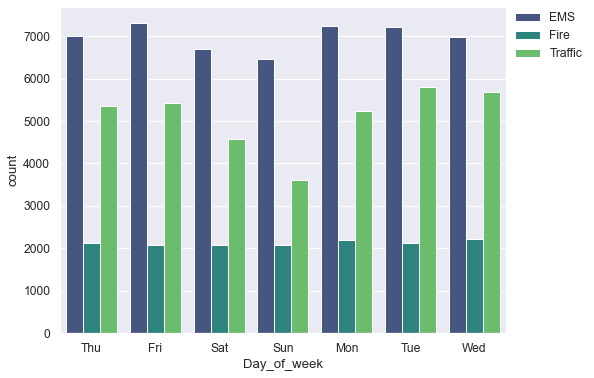

In [34]:
fig, counts = plt.subplots(figsize = (8,6))
counts = sns.countplot(x= 'Day_of_week', hue = 'Reason', data=df, palette = 'viridis')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0, frameon = False)
sns.set(font_scale = 1.2)

In [38]:
# From the above plot we can see that Emergency Medical calls were the highest on a Friday, Monday and Tuesday.  The other days
# counts are not far behind.  
# The calls for fire related emergencies is approximately constant for each day.
# Traffic related emergencies are the highest on weekdays with a Tuesday and Wednesday having the highest number of calls. 

** Create a countplot for the different months of the year.**

In [95]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


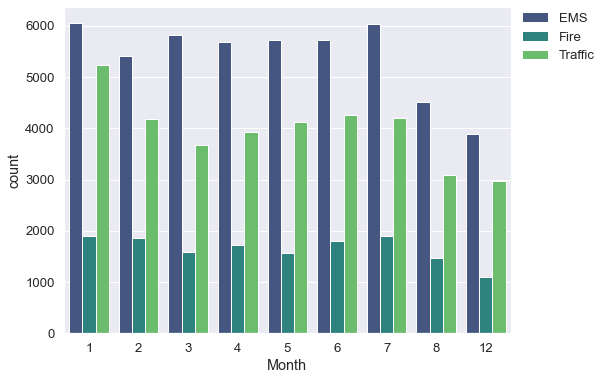

In [42]:
plt.figure(figsize = (8,6))
counts_months = sns.countplot(x= 'Month', hue = 'Reason', data=df, palette = 'viridis')
plt.legend(bbox_to_anchor = (1.2, 1), borderaxespad = 0, frameon = False)

In [49]:
# Viewing the original data we see that data was provided for 10 December 2015 - 24 August 2016.  This is why we do not have
# data for September, October and November.  We can also see that the amount of calls for December and August are less, and we 
# need to take into account that the last week of Augusts' data and the first 9 days of the December data is not inluded in the 
# dataset.  We can however better compare the months of January - July with each other from this plot:
# 
# The number of fire related calls in these months are all below 2000 per month.  May has least number of calls, with
# approximately 1600 calls that are fire related.  January has the most number of calls, with approximately 1900 calls. 
#
# Calls for medical related emergencies are approximately 6000 in January and July.  The number of calls for March, April, May 
# and June does not vary much.  The number of calls are approximately between 5700 and 5900.  February had the least number of 
# calls.
# January has the most traffic related calls of about 5200.  The other months calls vary between approximate numbers of 3700-4250.

** You should have noticed that 3 months data is missing from the data.  Let's attempt to estimate this information using a plot(s). **

** Create a gropuby object called call_counts, where you group the DataFrame by the month column and use the count() method for aggregation.**

In [51]:
call_counts = df.groupby('Month').count()
call_counts_5 = df.groupby('Month').count().head()
call_counts_5

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

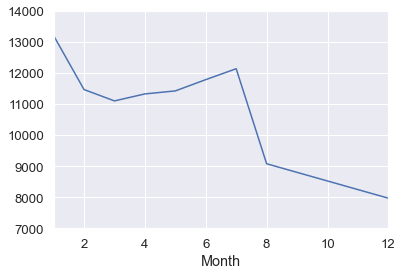

In [52]:
call_counts['timeStamp'].plot(xlim=(1,12), ylim=(7000,14000))

In [53]:
# The line plot shows the counts for the different months and we can also read of estimates for the months of September, October
# and November.  
# However, we know that these specific estimates are not good estimators for the number of calls per month since the data for
# August and December are not provided for all the days.
#
# The line plot can be used with more complete datasets, however regression analysis will provide better estimates.

** Use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [54]:
call_counts.reset_index(inplace=True)
call_counts

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


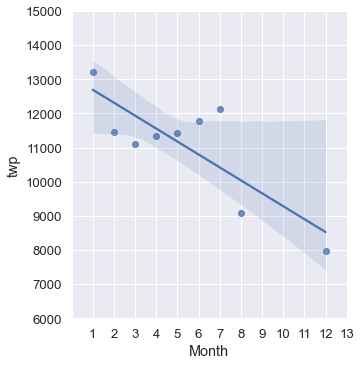

In [56]:
lmplot = sns.lmplot(x='Month', y='twp', data = call_counts)
lmplot.set(xlim=(0,13))
lmplot.set(ylim=(6000,15000), xticks=[1,2,3,4,5,6,7,8,9,10,11,12,13])

In [57]:
# From the above visualization, the line represents the best fit for the number of calls per month in the various townships.  The
# best fit line predicts the number of call in Juanuary to be apploximately 12800. The predicted number of calls for December is 
# approximately 8600. 

** Create a new column called 'Date' that contains the date from the timeStamp column.** 

In [58]:
df["Date"] = df.timeStamp.dt.date

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [59]:
# The table displays the number of calls per day for each date in our dataframe.

dates = df.groupby('Date').count()
dates

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


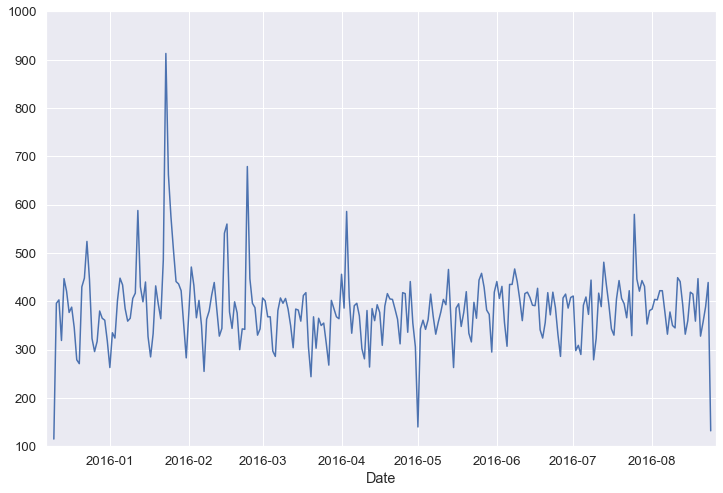

In [65]:
import datetime

dates['timeStamp'].plot(xlim=(datetime.date(2015,12,7), datetime.date(2016,8,26)), ylim =(100, 1000), figsize = (12,8));

In [66]:
# There is 1 major peak in January 2016 of over 900 calls.
# Other peaks we see: 
# December 2015: 1 upward peak of over 500 calls and 1 downward peak of just over 100 calls.
# January 2016 there are 2 upward peaks
# February 2016: 2 upward peaks
# At the beginning of April there is one upward peak of about 580 calls and at the end of April there is 1 downward peak of about
# 150 calls.
# July 2016: 1 upward peak of about 580 calls.
# August 2016: 1 downward peak of about 130 calls.

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

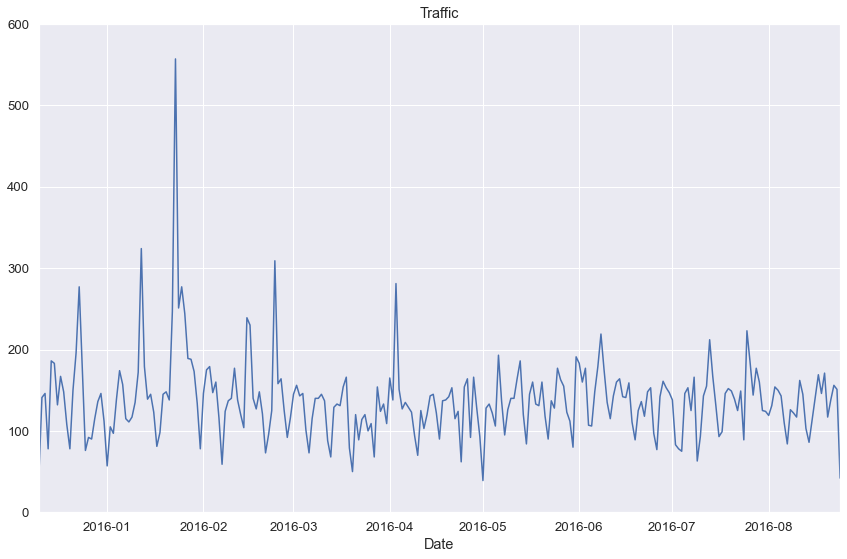

In [74]:
traffic = df[df['Reason'] == 'Traffic'].groupby('Date').count()['timeStamp'].plot(figsize = (12,8), title = "Traffic")
plt.xlim(datetime.date(2015,12,10), datetime.date(2016,8,24))
plt.ylim(0, 600);
plt.tight_layout()

In [70]:
# At more or less the same time in Jaunuary we see a great peak in calls for troffic related emergencies.  The number of calls
# on this day were aobut 560. 
# We also see a few other peaks: December there is 1, January there is another peak, February there is 1, April there is 1.
# We can thus deduce that these peak in calls for traffic related emergencies during these months were contributing to the 
# peak in calls that we saw in the general previous lineplot.

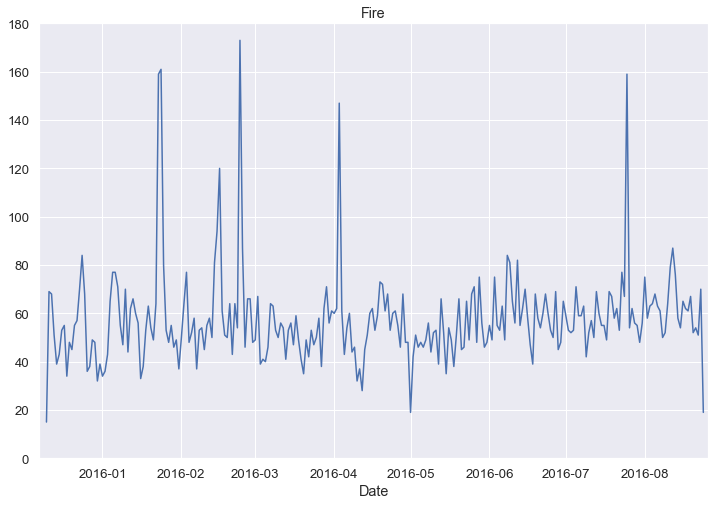

In [73]:
fires = df[df['Reason'] == 'Fire'].groupby('Date').count()['timeStamp'].plot(figsize = (12,8), title = "Fire")
plt.xlim(datetime.date(2015,12,7), datetime.date(2016,8,26))
plt.ylim(0, 180);

In [76]:
# We notice 5 major peaks for calls related to fires.
# January 2016: 1 major peak
# February 2016: 2 major peaks
# beginning April 2016: 1 major peak.
# Towards the end of July there is 1 major peak
# All these peaks in calls for fire related emergencies contributes to the spikes that we see at the same times in the general
# lineplot above. 

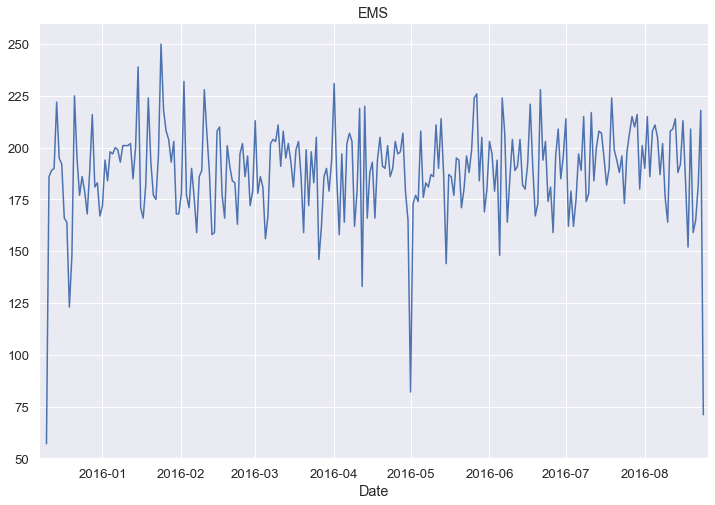

In [80]:
ems = df[df['Reason'] == 'EMS'].groupby('Date').count()['timeStamp'].plot(figsize = (12,8), title = "EMS")
plt.xlim(datetime.date(2015,12,7), datetime.date(2016,8,26))
plt.ylim(50, 260);

In [82]:
# From the plot for emergency calls per day we see that there were many days where calls reached a number of over 200.  There was
# one day in January that apporoximately 250 calls were received for medical related emergencies. 
# We notice 3 major downward peaks: 1 on 10 December 2015 with about 55 calls, another at the end of April (approximately 80 calls)
# and one on 24 August with about 70 calls. 
# The downward peaks are contributing to the great downward peak of calls, as we see in the general lineplot (of per day calls)
# above.


** Create a dataframe with Days of week as the index and Hours as the columns.**

In [465]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [83]:
hours_df = pd.crosstab(df['Day_of_week'], df['Hour'])
hours_df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Create a HeatMap measuring the number of calls per day of the week against the hour of the day.**

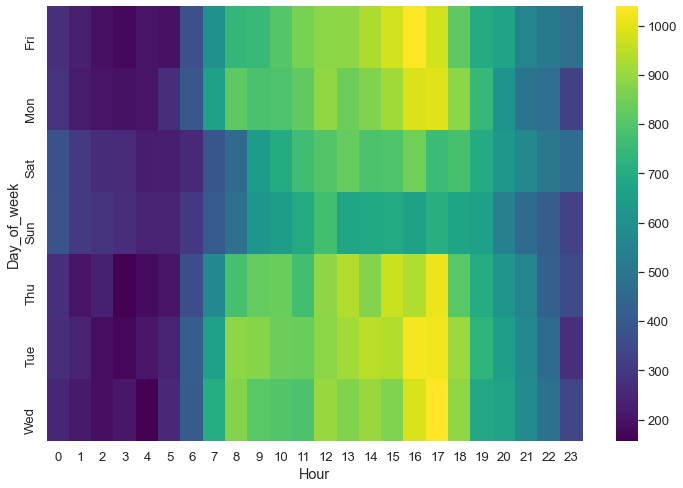

In [84]:
plt.figure(figsize = (12,8))
sns.heatmap(hours_df, cmap = 'viridis');

In [85]:
# From the heatmap we can make the following deductions for calls made to 911 during December 2015 - August 2016:
# On weekdays the most calls were made between 8am and 6pm.  
# The top number of calls were on a Monday and Tuesday 16:00-18:00, Wednesday and Thursday 17:00-18:00 and a Friday 16:00-17:00.
# Emergency call numbers dropped a lot over weekends. 
# The least number of calls were made between 12am and 5am Monday - Friday.

** Now create a clustermap using this DataFrame. **

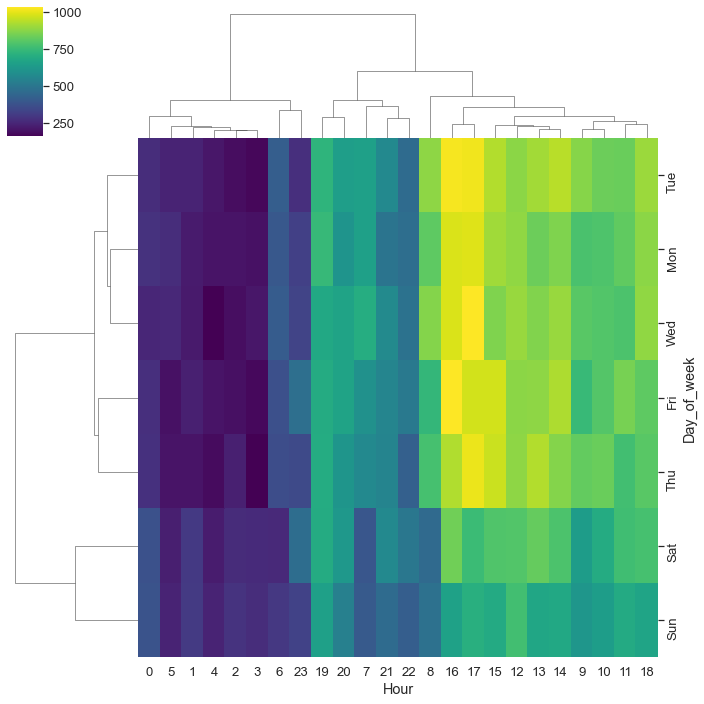

In [86]:
sns.clustermap(hours_df, cmap = 'viridis')

In [87]:
# Analysing the clustermap where the 'same type' hours have been grouped together, we can make analyse the hours more in detail:
# The most number of calls were made on a Tuesday 16:00-18:00
# The timeblock with the most number of calls were Monday - Friday 09:00-18:00
# The timeblock with the least number of calls were 00:00 - 05:00 Monday - Friday.
# The least number of call occured on Tuesday and Thursday 03:00-04:00 and Wednesday 04:00-05:00

** Create a DataFrame with the Months as the columns and the Day of week as rows. **

In [88]:
months_days = pd.crosstab(df['Day_of_week'], df['Month'])
months_days

Month,1,2,3,4,5,6,7,8,12
Day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


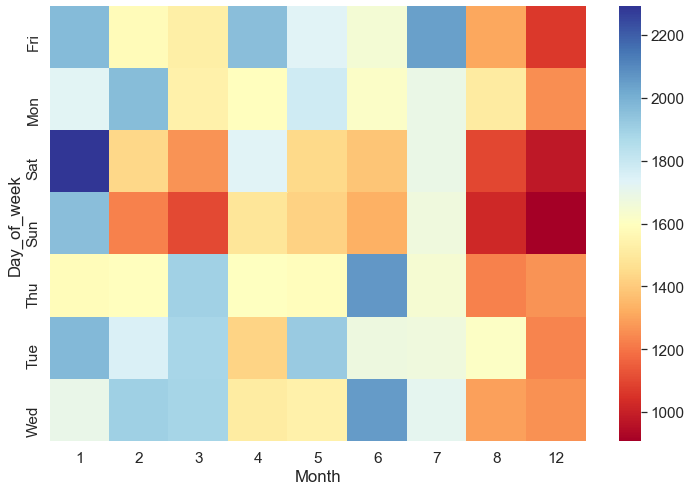

In [93]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(months_days, cmap = 'RdYlBu')
sns.set(font_scale = 1.4)

In [89]:
# From the heatmap we can see that the most number of calls were made on Saturdays in January 2016 and the least number of calls were
# made on Sundays in December 2015

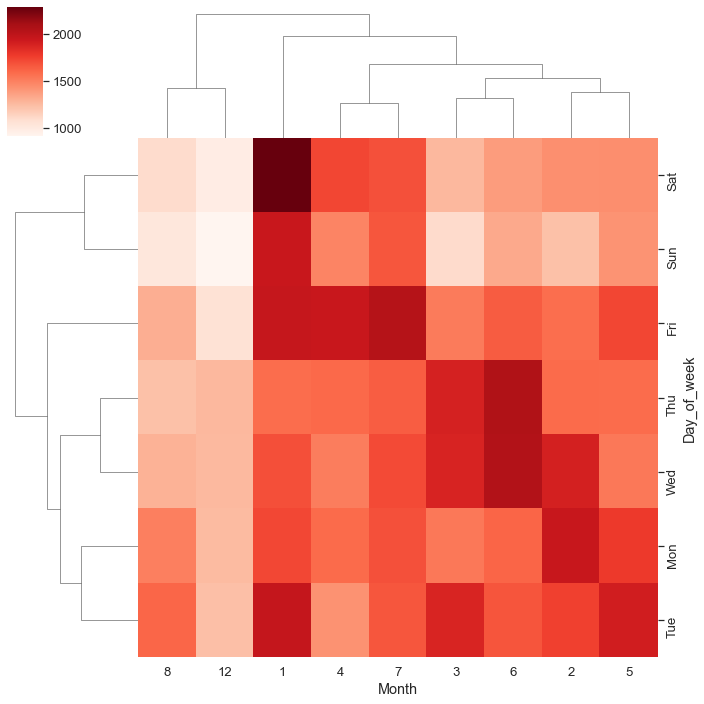

In [90]:
sns.clustermap(months_days, cmap = 'Reds')

In [94]:
# From the clustermap we can see that the timeblock with the least number of calls are in the months of August and December,
# which is understandable since we do not have the complete months' data.  Another timeblock indicating the least number of calls
# are months February, March, May and June on a Saturday and Sunday.
#
# The most calls were made on a Saturday in January.  The second most calls was on Wednesdays and Thursdays in June and Fridays 
# in July.

## Thank you for viewing my project! I hope you enjoyed it.